The solutions manual has some solutions. Tomoki also has solutions. I have tried to solve as many from the rest as possible.

In [26]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import nct as nct
from scipy.stats import f as fdist
from scipy.stats import ncf as ncfdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym
import random
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

In [27]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_norm(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [28]:
def dxc2(a,t,dof):
    return (chi2.cdf(a, dof)-t)
def invert_chi2(t,dof):
    a = 0
    b = 100.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxc2(c,t,dof)) > tol):
        c = (a+b)/2
        if(dxc2(c,t,dof) < 0):
            a = c
        else:
            b = c
    return c

In [29]:
def dxt(a,df,t):
    return (studt.cdf(a, df, loc=0, scale=1)-t)
def invert_studt(t,df):
    a = 10.0 * int(np.sqrt(df/(df-2)))
    b = -10.0 * int(np.sqrt(df/(df-2)))
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxt(c,df,t)) > tol):
        c = (a+b)/2
        if(dxt(c,df,t) > 0):
            a = c
        else:
            b = c
    return c

#### Exercise 8.3.1. 

*Verzani* $(2014)$ discusses a data set on healthy individuals, including their temperatures by gender. The data are in the file *tempbygender.rda* and the variables of interest are *maletemp* and *femaletemp*. Download this file from the site listed in the Preface.

***(a)*** Obtain comparison boxplots. Comment on the plots. Which, if any, gender seems to have lower temperatures? Based on the width of the boxplots, comment on the assumption of equal variances.

***(b)*** As discussed in Example $8.3.3,$ compute the two-sample, two-sided t-test that there is no difference in the true mean temperatures between genders. Obtain the p-value of the test and conclude in terms of the problem at the nominal $\alpha$-level of $0.05.$

***(c)*** Obtain a $95\%$ confidence interval for the difference in means. What does it mean in terms of the problem?

#### Solution:

In [30]:
# (a)

data = pd.read_csv('data/tempbygender.csv')
data.rename(columns={'temp': 'Temperature', 'gender': 'Gender'}, inplace=True)
data = data[['Temperature','Gender']].copy()
dfm = data[data['Gender']=='male']
dfm.reset_index(inplace=True,drop=True)
dfm = dfm[['Temperature']].copy()
dfm.rename(columns={'Temperature':'MaleTemp'},inplace=True)
dff = data[data['Gender']=='female']
dff.reset_index(inplace=True,drop=True)
dff = dff[['Temperature']].copy()
dff.rename(columns={'Temperature':'FemaleTemp'},inplace=True)
df_concat = pd.concat([dfm, dff], axis=1)
df_concat.head()

,MaleTemp,FemaleTemp
0,96.3,96.4
1,96.7,96.7
2,96.9,96.8
3,97.0,97.2
4,97.1,97.2


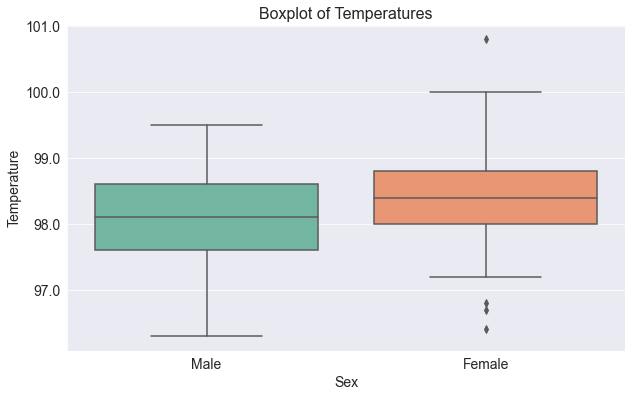

In [31]:
plt.figure(figsize = (10,6))

sns.set_style('darkgrid')
sns.set_palette('Set2')

ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_concat))

plt.title('Boxplot of Temperatures',fontsize = 16)
plt.ylabel('Temperature',fontsize = 14)
plt.xlabel('Sex',fontsize = 14)

ax.set_yticklabels(ax.get_yticks(), size = 14)
ax.set_xticklabels(['Male','Female'], size = 14)

plt.show()

***(a)*** Looks like females run hotter than men. Variance does seem to be higher in men. Interesting to see that there are quite a few outliers in the dataset for females.

In [32]:
# (b)

n = len(dfm)
m = len(dff)
xb = np.mean(dfm['MaleTemp'])
yb = np.mean(dff['FemaleTemp'])
t = np.sqrt(n*m/(n+m)*(n+m-2))*(xb-yb)/np.sqrt(np.sum(dfm['MaleTemp']**2-xb**2)+np.sum(dff['FemaleTemp']**2-yb**2)) # Equation 8.3.4 of the text
p = studt.cdf(t,(n+m-2),loc=0,scale=1)+1-studt.cdf(-1*t,(n+m-2),loc=0,scale=1)
t,p

(-2.285434538168411, 0.023931883122226605)

In [33]:
# This is not exactly the sp from equation 4.2.11 but basically includes (1/n+1/m) term as well.

sp = np.sqrt(np.sum(dfm['MaleTemp']**2-xb**2)+np.sum(dff['FemaleTemp']**2-yb**2))/np.sqrt(n*m/(n+m)*(n+m-2))

In [34]:
# (c)

ta = invert_studt(0.975,(n+m-2))

(xb-yb-ta*sp,xb-yb+ta*sp) # Directly from equation 4.2.13 from the textbook.

(-0.5396506345020899, -0.038810903959420884)

#### Answer from the back of the textbook

$8.3.1.$ 

***(b)*** $t = −2.2854,$ $p = 0.02393;$

***(c)*** $(−0.5396 − 0.0388).$

#### Exercise 8.3.5. 

In Example $8.3.2$, the power function for the one-sample t-test is discussed.

***(a)*** Plot the power function for the following setup: $X$ has a $N(\mu,\sigma^2)$ distribution; $H_0 :\mu=50$ versus $H_1 :\mu \neq 50;$ $\alpha=0.05;$ $n=25;$ and $\sigma=10.$

***(b)*** Overlay the power curve in ***(a)*** with that for $\alpha = 0.01.$ Comment.

***(c)*** Overlay the power curve in ***(a)*** with that for $n = 35.$ Comment.

***(d)*** Determine the smallest value of $n$ so the power exceeds $0.80$ to detect $\mu = 53.$ *Hint*: Modify the R function *tpowerg.R* so it returns the power for a specified alternative.

As usual, the R code *tpowerg.R* was converted to Python through the following website

https://www.codeconvert.ai/r-to-python-converter

In [35]:
def tpowerg(mu0, sig, n, alpha=0.05, byv=0.1):
    """
    Graphs power function for t-test of mu = mu0 vs mu not= mu0
    """
    fse = 4 * sig / np.sqrt(n)
    maxmu = mu0 + fse
    tc = studt.ppf(1 - (alpha / 2), n - 1)
    minmu = mu0 - fse
    mu1 = np.arange(minmu, maxmu+byv, byv)
    delta = (mu1 - mu0) / (sig / np.sqrt(n))
    gammas = []
    for dlt in delta:
        gammas.append(1 - studt.cdf(tc, n - 1, loc=dlt) + studt.cdf(-tc, n - 1, loc=dlt))
    return mu1,np.array(gammas)

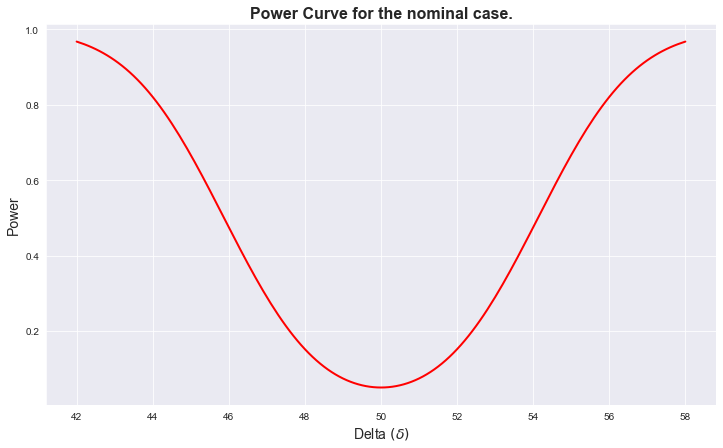

In [36]:
# (a)
a0 = 0.05
sig = 10
n0 = 25
mu0 = 50

mua,gma = tpowerg(mu0, sig, n0, alpha=a0)

plt.figure(figsize = (12,7))

plt.plot(mua,gma,linewidth=2,color='r')
plt.ylabel('Power',fontsize=14)
plt.xlabel('Delta $(\\delta)$',fontsize=14)
plt.title('Power Curve for the nominal case.',fontsize=16,fontweight='bold')
plt.show()

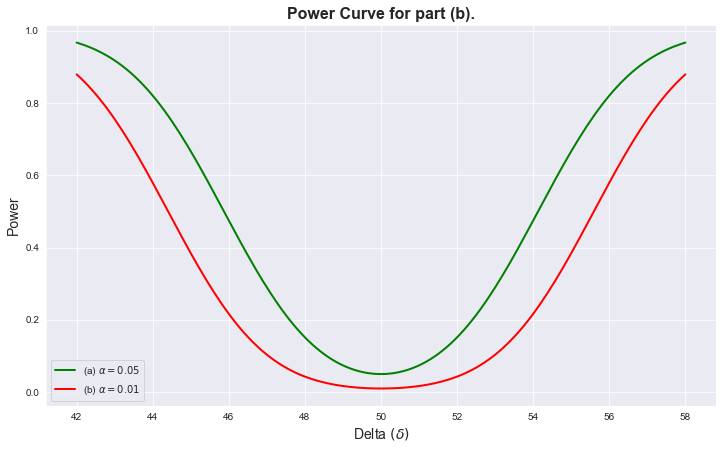

In [37]:
# (b)
a1 = 0.01

mub,gmb = tpowerg(mu0, sig, n0, alpha=a1)

plt.figure(figsize = (12,7))

plt.plot(mua,gma,linewidth=2,color='g')
plt.plot(mub,gmb,linewidth=2,color='r')
plt.ylabel('Power',fontsize=14)
plt.xlabel('Delta $(\\delta)$',fontsize=14)
plt.title('Power Curve for part (b).',fontsize=16,fontweight='bold')
plt.legend(['(a) $\\alpha = 0.05$', '(b) $\\alpha = 0.01$'])
plt.show()

#### Comment for part (b):

Lower significance level implies poorer power.

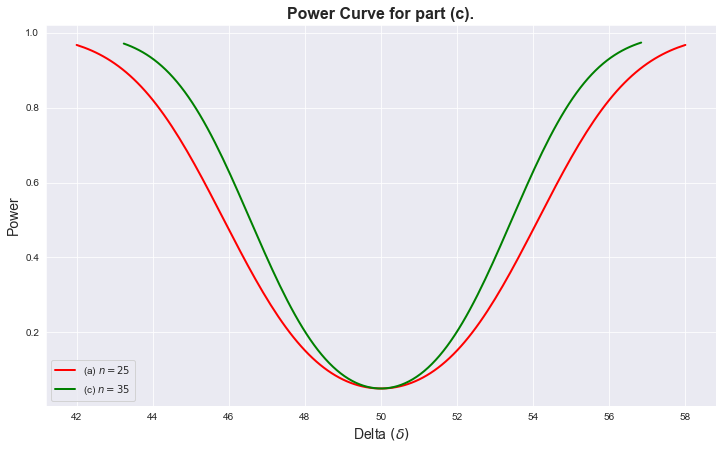

In [38]:
# (c)
n1 = 35

muc,gmc = tpowerg(mu0, sig, n1, alpha=a0)

plt.figure(figsize = (12,7))

plt.plot(mua,gma,linewidth=2,color='r')
plt.plot(muc,gmc,linewidth=2,color='g')
plt.ylabel('Power',fontsize=14)
plt.xlabel('Delta $(\\delta)$',fontsize=14)
plt.title('Power Curve for part (c).',fontsize=16,fontweight='bold')
plt.legend(['(a) $n = 25$', '(c) $n = 35$'])
plt.show()

#### Comment for part (c):

More samples implies better power.

In [39]:
def tpowern(mu0,mu1 ,sig, alpha=0.05, nmax = 200):
    """
    Graphs power function for t-test of mu = mu0 vs mu not= mu0
    """
    nsample = [i for i in range(1,nmax+1)]
    gammas = []
    for n in nsample:
        fse = 4 * sig / np.sqrt(n)
        maxmu = mu0 + fse
        tc = studt.ppf(1 - (alpha / 2), n - 1)
        minmu = mu0 - fse
        delta = (mu1 - mu0) / (sig / np.sqrt(n))
        gammas.append(1 - studt.cdf(tc, n - 1, loc=delta) + studt.cdf(-tc, n - 1, loc=delta))
        
    return nsample,np.array(gammas)

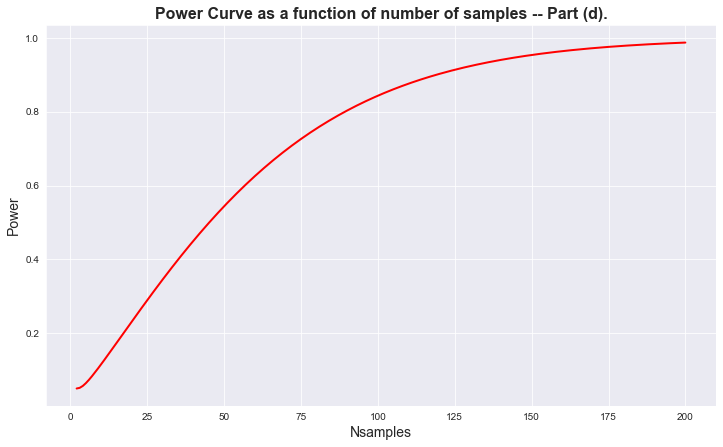

In [40]:
# (d)

mud = 53
nsamplesd,gmd = tpowern(mu0,mud ,sig,a0,200)

plt.figure(figsize = (12,7))

plt.plot(nsamplesd,gmd,linewidth=2,color='r')
plt.ylabel('Power',fontsize=14)
plt.xlabel('Nsamples',fontsize=14)
plt.title('Power Curve as a function of number of samples -- Part (d).',fontsize=16,fontweight='bold')
plt.show()

In [41]:
nd0 = np.where(gmd>0.8)[0][0]
nd = nsamplesd[nd0]
print('Number of samples needed to have a power of 0.8 is n='+str(nd))

Number of samples needed to have a power of 0.8 is n=90


#### Answer from the back of the texbook

8.3.5. 

***(d)*** $n = 90.$

#### Exercise 8.3.6. 

The effect that a certain drug (Drug A) has on increasing blood pressure is a major concern. It is thought that a modification of the drug (Drug B) will lessen the increase in blood pressure. Let $\mu_A$ and $\mu_B$ be the true mean increases in blood pressure due to Drug A and B, respectively. The hypotheses of interest are $H_0 : \mu_A = \mu_B = 0$ versus $H1 : \mu_A > \mu_B = 0.$ The two-sample t-test statistic discussed in Example $8.3.3$ is to be used to conduct the analysis. The nominal level is set at $\alpha = 0.05.$ For the experimental design assume that the sample sizes are the same ; i.e., $m=n.$ Also, based on data from Drug A, $\sigma=30$ seems to be a reasonable selection for the common standard deviation. Determine the common sample size, so that the difference in means $\mu_A − \mu_B = 12$ has an $80\%$ detection rate. Suppose when the experiment is over, due to patients dropping out, the sample sizes for Drugs A and B are respectively $n = 72$ and $m = 68.$ What was the actual power of the experiment to detect the difference of $12$?


#### Solution

This is a one sided test. So the parameters from the text will change appropriately.

$t = qt(1-\alpha, (n+m-2))$ instead of $t = qt(1-\alpha/2, (n+m-2))$ (the R code to find the critical value), the noncentrality parameter $\delta_2$ remains the same, and the R code for power is $1- pt(t,(n+m-2),ncp=\delta_2).$

In [42]:
def get_tstat(xlist,ylist):
    nx = len(xlist)
    ny = len(ylist)
    xb = np.mean(xlist)
    yb = np.mean(ylist)
    sbx = np.sum([(xi-xb)**2 for xi in xlist])
    sby = np.sum([(yi-yb)**2 for yi in ylist])
    sb = (sbx+sby)/(nx+my-2)
    tstat = np.sqrt(nx*my/(nx+my))*(xb-yb)/np.sqrt(sb)
    return tstat

def get_delta(n,m,dlta,sgma):
    return np.sqrt(n*m/(n+m))*dlta/sgma

In [43]:
def get_pwr(n,m,dlta,sgma,alph):
    t=studt.ppf(1-alph,(n+m-2),loc=0,scale=1)
    d2 = get_delta(n,m,dlta,sgma)
    return (1-nct.cdf(t,(n+m-2),nc=d2,loc=0,scale=1))

def get_sample_size(dlta,sgma,alph,pwr):
    for i in range(20,100):
        thispwr = get_pwr(i,i,dlta,sgma,alph)
        if(thispwr > pwr):
            return i

In [44]:
print(get_sample_size(12,30,0.05,0.8),get_pwr(78,78,12,30,0.05),get_pwr(72,68,12,30,0.05))

78 0.8001474172270311 0.7608348045643307


#### Answer from the back of the book:

***8.3.6*** $78$; $0.7608.$

#### Exercise 8.3.8. 

Let $X_1,X_2,\cdots,X_n$ be a random sample from the normal distribution $N(\theta,1).$ Show that the likelihood ratio principle for testing $H_0 : \theta = \theta',$ where $\theta'$ is specified,
against $H_1 : \theta  \neq \theta'$ leads to the inequality $\lvert x − \theta' \rvert \geq c.$

***(a)*** Is this a uniformly most powerful test of $H_0$ against $H_1$?

***(b)*** Is this a uniformly most powerful unbiased test of $H_0$ against $H_1$?

#### Solution:

***(a)*** In example $8.2.3$, it was shown that there is no UMP test of $H_0$ against $H_1$.

***(b)*** Look at Example $27-3$ in 

https://online.stat.psu.edu/stat415/book/export/html/847

The likelihood ratio turns out to be

$$
\begin{align}
\frac{L(\hat{\omega})}{L(\hat{\Omega})} &= \cfrac{\left(\frac{1}{2\pi}\right)^n}{\left(\frac{1}{2\pi}\right)^n} \frac{\exp{\left [ -\sum_{i=1}^n(x_i-\theta')^2/2 \right ]}}{\exp{\left [ -\sum_{i=1}^n(x_i-\overline{x})^2/2 \right ]}} \\
&= \exp{\left [ \frac{-n(\overline{x}-\theta')^2}{2} \right ]} \\
&\leq c_1 \\
\Longleftrightarrow ~~  -\frac{n(\overline{x}-\theta')^2}{2}  &\leq \log{c_1} \\
\Longleftrightarrow \lvert x − \theta' \rvert &\geq c_2
\end{align}
$$

where $$c_2 = \sqrt{-\frac{2}{n}\log{c_1}}.$$

Note that proving that this is UMPU is not straightforward. We can prove that this likelihood ratio test is unbiased, and we have to use the statement of the authors on page $488$ -- "Then it follows from Lehmann that it is an UMP unbiased level α test." But an actual proof that this test is UMPU is in Lemma $2.1$ of https://sites.stat.washington.edu/jaw/COURSES/580s/581/LECTNOTES/ch6a.pdf and the same proof can be found in https://www2.stat.duke.edu/courses/Spring22/sta732.01/lecture20.pdf . These are actually from Lehmann and Romano's book "Testing Statistical Hypothesis" and this proof requires more theoretical background like $\alpha-$similarity. All we can do is to prove that this test is unbiased and have to leave it at that. The part that this is unbiased has a proof exactly same as in exercise $8.3.21.$

Related SE links:

https://stats.stackexchange.com/a/267068/183497

https://stats.stackexchange.com/a/478472/183497

https://math.stackexchange.com/a/4503996/145325

https://stats.stackexchange.com/a/657874/183497

Following is a great video lecture on UMP unbiased test:

https://youtu.be/I7ZjISYU6N8?si=leqpkSgNF8x-c2Gd

#### Exercise 8.3.9. 

Let $X_1,X_2,\cdots,X_n$ be iid $N(\theta_1,\theta_2).$ Show that the likelihood ratio principle for testing $H_0 : \theta_2 = \theta_2'$ specified, and $\theta_1$ unspecified, against $H_1 : \theta_2  \neq \theta_2' ,$ $\theta_1$ unspecified, leads to a test that rejects when $\sum_{i=1}^n (x_i −\overline{x})^2 \leq c_1$ or $\sum_{i=1}^n (x_i −\overline{x})^2 \geq c_2$, where $c_1 < c_2$ are selected appropriately.


#### Comments:

This question is exactly same as exercise $6.5.4$ and Tomoki's solution over there is quite complete. 

Following is a SE link that clearly explains the complete throught process.

https://stats.stackexchange.com/questions/189153/likelihood-ratio-test-for-the-variance-of-a-normal-distribution

and so does the following one resembling Tomoki's approach

https://stats.stackexchange.com/a/457763/183497

#### Exercise 8.3.10. 

For the situation discussed in Example $8.3.5$, derive the power function for the likelihood ratio test statistic given in expression $(8.3.9).$

#### Solution:

The power function is $P(F \leq c_1)+P(F \geq c_2)$ under the alternative hypothesis $H_1 : \theta_3 \neq \theta_4$. Here, $c_1$ and $c_2$ are found using $P(F \leq c_1) = \alpha/2$ and $P(F \geq c_2) = \alpha/2$ under the null hypothesis $H_0 : \theta_3 = \theta_4$. Also, $F$ is given by 

$$
F = \frac{\sum_{i=1}^n (X_i-\overline{X})^2/(n-1)}{\sum_{j=1}^m (Y_j-\overline{Y})^2/(m-1)}. \tag{8.3.9}
$$

This does have $F-$distribution under the null hypothesis as both the numerator and denomenator of the expression above have an expectation of $\theta_3 = \theta_4$. So by dividing them by the variance, we get a numerator and denomenator with $\chi^2$ distribution which has an $F-$distribution.

For the power function though, we need $P(F \leq c_1)+P(F \geq c_2)$ under the alternative hypothesis where $\theta_3 \neq \theta_4$. Under the alternative hypothesis, $F \times \theta_4/\theta_3$ has $F-$distribution and hence the power function will be $1-F(c_2 \times \theta_4/\theta_3)+F(c_1 \times \theta_4/\theta_3)$ where now $F()$ is the cdf of $F-$distribution with $n-1$ and $m-1$ degrees of freedom.

#### Exercise 8.3.11. 

Let $X_1,\cdots,X_n$ and $Y_1,\cdots,Y_m$ be independent random samples from the distributions $N(\theta_1,\theta_3)$ and $N(\theta_2,\theta_4),$ respectively.

***(a)*** Show that the likelihood ratio for testing $H_0 : \theta_1 = \theta_2,$ $\theta_3 = \theta_4$ against all alternatives is given by

$$
\dfrac{\Bigg [ \displaystyle \sum_{i=1}^n(x_i - \overline{x})^2 \Big/ n \Bigg ]^{n/2} \Bigg [ \sum_{j=1}^m(y_j - \overline{y})^2 \Big/m \Bigg ]^{m/2}}{\left \{ \Bigg [ \displaystyle\sum_{i=1}^n(x_i - u)^2 + \sum_{j=1}^m(y_j - u)^2 \Bigg ] \Big/(n+m)\right \}^{(n+m)/2}}
$$

where $u = (n\overline{x}+m\overline{y})/(n+m)$.

***(b)*** Show that the likelihood ratio for testing $H_0 : \theta_3 = \theta_4$ with $\theta_1$ and $\theta_2$ unspecified can be based on the test statistic $F$ given in expression $(8.3.9).$

#### Solution:

***(a)*** We have

$$
\begin{align}
L(\omega) &= \left( \frac{1}{2\pi\theta_3} \right)^{(n+m)/2}\exp{\left [ -\frac{\sum_{i=1}^n(x_i - \theta_1)^2 + \sum_{j=1}^m(y_j - \theta_1)^2}{2\theta_3} \right]} \\
L(\Omega) &= \left( \frac{1}{2\pi\theta_3} \right)^{n/2}\exp{\left [ -\frac{\sum_{i=1}^n(x_i - \theta_1)^2}{2\theta_3} \right]} \times \left( \frac{1}{2\pi\theta_4} \right)^{m/2}\exp{\left [ -\frac{\sum_{j=1}^m(y_j - \theta_2)^2}{2\theta_4} \right]}.
\end{align}
$$

The MLE under $H_0$ is as if we are maximizing the pooled sample (with common parameters of course) of size $n+m$ whose distribution is $N(\theta_1,\theta_3).$ So we get the likelihood ratio when maximized, as

$$
L(\hat{\omega}) = \left ( \cfrac{e^{-1}}{2 \pi w_0} \right )^{(n+m)/2}
$$

where

$$
w_0 =  \Bigg \{ \displaystyle\sum_{i=1}^n(x_i - u)^2 + \sum_{j=1}^m(y_j - u)^2 \Bigg \} \Big/(n+m)
$$
 
where

$$
u = \frac{\sum_{i=1}^n(x_i) + \sum_{j=1}^m(y_j)}{n+m}
$$

which happens to be same as

$$u = \frac{n\overline{x}+m\overline{y}}{n+m}$$.

As regards to the alternative, it is just the product of the individual likelihoods of the two samples that have different parameters. So when maximized, it is basically same as maximizing the individual likelihoods so that we have

$$
L(\hat{\Omega}) = \left ( \cfrac{e^{-1}}{2 \pi w_x} \right )^{n/2} \left ( \cfrac{e^{-1}}{2 \pi w_y} \right )^{m/2}
$$

where

$$
\begin{align}
w_x &=  \frac{1}{n} \displaystyle\sum_{i=1}^n(x_i - \overline{x})^2 \\
w_x &=  \frac{1}{m} \displaystyle\sum_{j=1}^m(y_j - \overline{y})^2
\end{align}
$$

so that 

$$
\begin{align}
\Lambda &= \cfrac{L(\hat{\omega})}{L(\hat{\Omega})} \\
&= \cfrac{w_x^{n/2}w_y^{m/2}}{w_0^{(n+m)/2}}\\
&= \dfrac{\Bigg [ \displaystyle \sum_{i=1}^n(x_i - \overline{x})^2 \Big/ n \Bigg ]^{n/2} \Bigg [ \sum_{j=1}^m(y_j - \overline{y})^2 \Big/m \Bigg ]^{m/2}}{\left \{ \Bigg [ \displaystyle\sum_{i=1}^n(x_i - u)^2 + \sum_{j=1}^m(y_j - u)^2 \Bigg ] \Big/(n+m)\right \}^{(n+m)/2}}
\end{align}
$$

where $u = (n\overline{x}+m\overline{y})/(n+m)$.

***(b)*** The hypothesis $H_0$ is same as the alternative $H_1$ of example $8.3.1$ where it was shown that the linkelihood ratio, after maximizing, is given by

$$
L(\hat{\omega}) = \left ( \cfrac{e^{-1}}{2 \pi w'_0} \right )^{(n+m)/2}
$$

where

$$
w'_0 =  \Bigg \{ \displaystyle\sum_{i=1}^n(x_i - \overline{x})^2 + \sum_{j=1}^m(y_j - \overline{y})^2 \Bigg \} \Big/(n+m)
$$

whereas the maximized likelihood under the alternative, $L(\hat{\Omega})$, remains the same as in part ***(a)*** given by

$$
L(\hat{\Omega}) = \left ( \cfrac{e^{-1}}{2 \pi w_x} \right )^{n/2} \left ( \cfrac{e^{-1}}{2 \pi w_y} \right )^{m/2}
$$

where

$$
\begin{align}
w_x &=  \frac{1}{n} \displaystyle\sum_{i=1}^n(x_i - \overline{x})^2 \\
w_x &=  \frac{1}{m} \displaystyle\sum_{j=1}^m(y_j - \overline{y})^2.
\end{align}
$$

Hence the likelihood ratio ends up being

$$
\begin{align}
\Lambda &= \cfrac{L(\hat{\omega})}{L(\hat{\Omega})} \\
&= \cfrac{w_x^{n/2}w_y^{m/2}}{w_0^{(n+m)/2}}\\
&= \dfrac{\Bigg [ \displaystyle \sum_{i=1}^n(x_i - \overline{x})^2 \Big/ n \Bigg ]^{n/2} \Bigg [ \sum_{j=1}^m(y_j - \overline{y})^2 \Big/m \Bigg ]^{m/2}}{\left \{ \Bigg [ \displaystyle \sum_{i=1}^n(x_i - \overline{x})^2 + \sum_{j=1}^m(y_j - \overline{y})^2 \Bigg ] \Big/(n+m)\right \}^{(n+m)/2}} \\
&= \dfrac{(n+m)^{(n+m)/2}}{n^{n/2}m^{m/2}} \dfrac{\left [\displaystyle \sum_{i=1}^n(x_i - \overline{x})^2 \Big/ \sum_{j=1}^m(y_j - \overline{y})^2 \right]^{n/2}}{\left [1 + \displaystyle \sum_{i=1}^n(x_i - \overline{x})^2 \Big/ \sum_{j=1}^m(y_j - \overline{y})^2 \right]^{(n+m)/2}} \\
&\propto \dfrac{F^{n/2}}{\left[ \displaystyle 1 + \frac{n-1}{m-1}F \right]^{(n+m)/2}}.
\end{align}
$$

This kind of function has a unimodal characteristic which dies down for too low or too high a value of $F$ as shown in https://stats.stackexchange.com/a/457763/183497. So a test like $\Lambda \leq c$ will be equivalent to $F \leq c_1$ or $F \geq c_2$. Hence we can conclude that such a test can be based on the statistic $F$ given in expression $(8.3.9)$.

#### Exercise 8.3.12. 

Let $Y_1 < Y_2 < \cdots < Y_5$ be the order statistics of a random sample of size $n = 5$ from a distribution with pdf $f(x;\theta) = \frac{1}{2} \exp{−|x−\theta|},$ $−\infty < x < \infty,$ for all real $\theta.$ Find the likelihood ratio test $\Lambda$ for testing $H_0 : \theta = \theta_0$ against $H_1 : \theta  \neq \theta_0.$

#### Solution:

Not sure why this exercise was even given because it is a repeat of example $6.3.4.$ Right after equation $6.3.24,$ we can see that the "Wald" test statistic was found to be $\chi_W^2 = \left[ \sqrt{n}(\theta_0-Q_2)\right]^2$ and the "Wald" test is $\chi_W^2 \geq \chi_\alpha^2(1).$ This is an asymptotic test. If we translate it to the present situation, it comes out to be equivalent to $\lvert y_3-\theta_0\rvert \geq c,$ matching the answer given at the back of the book.

The solutions manual and Tomoki's solution suggest some type of an identity like 

$$\sum_{i=1}^n \lvert (x_i-\theta_0)\rvert = \sum_{i=1}^n \lvert (x_i-y_3)\rvert + n \lvert (y_3-\theta_0)\rvert$$

or 

$$\sum_{i=1}^n \lvert (x_i-\theta_0)\rvert = \sum_{i=1}^n \lvert (x_i-y_3)\rvert + \lvert (y_3-\theta_0)\rvert$$

but as the simple code below shows, there is no such relationship. The Fischer information turns out to be $1$, due to which the "asymptotic Wald" test in section $6.3$ results in the final answer and not because of any other identity as mentioned in solutions manuals (which are clearly false).

In [45]:
xlist = [3,5,7,9,11]
tlist = [1,4,8,10,12]

q2 = xlist[int((len(xlist)-1)/2)]

for teta in tlist:
    thissum = 0
    for i in range(len(xlist)):
        thissum = thissum+np.abs(xlist[i]-teta)-np.abs(xlist[i]-q2)
    target = np.abs(teta-q2)
    print(teta,thissum,target)

1 18 6
4 5 3
8 1 1
10 5 3
12 13 5


#### Exercise 8.3.15. 

Let $X_1, X_2, \cdots , X_n$ and $Y_1, Y_2, \cdots , Y_n$ be independent random samples from two normal distributions $N(\mu_1,\sigma^2)$ and $N(\mu_2,\sigma^2),$ respectively, where $\sigma^2$ is the common but unknown variance.

***(a)*** Find the likelihood ratio $\Lambda$ for testing $H_0 : \mu_1 = \mu_2 = 0$ against all alternatives.

***(b)*** Rewrite $\Lambda$ so that it is a function of a statistic $Z$ which has a well-known distribution.

***(c)*** Give the distribution of $Z$ under both null and alternative hypotheses.

#### My attempt:

Wouldn't dare call this a solution!!

This was asked on SE but at the time of typing this, the solution given does not seem right.

https://stats.stackexchange.com/q/599057/183497

***(a) and (b)*** The random variable $\Lambda^{1/n}$ (following the footsteps of example $8.3.1$) comes out to be

$$
\begin{align}
\Lambda^{1/n} &= \dfrac{\displaystyle \sum_{i=1}^n(X_i - \bar{X})^2 + \sum_{j=1}^n(Y_j - \bar{Y})^2}{\displaystyle \sum_{i=1}^n X_i^2 + \sum_{j=1}^n Y_j^2} \\
&= \dfrac{\displaystyle \sum_{i=1}^n(X_i - \bar{X})^2 + \sum_{j=1}^n(Y_j - \bar{Y})^2}{\displaystyle \sum_{i=1}^n(X_i - \bar{X})^2 + \sum_{j=1}^n(Y_j - \bar{Y})^2 +n(\overline{X}^2+\overline{Y}^2)} \\
&= \dfrac{1}{1+n\cfrac{\overline{X}^2+\overline{Y}^2}{\displaystyle \sum_{i=1}^n(X_i - \bar{X})^2 + \sum_{j=1}^n(Y_j - \bar{Y})^2}} \\
&= \dfrac{1}{1+\cfrac{n \left(\overline{X}^2+\overline{Y}^2\right) \Big/ \sigma^2}{(n-1)\left( \displaystyle \frac{\sum_{i=1}^n(X_i - \bar{X})^2}{n-1} + \frac{\sum_{j=1}^n(Y_j - \bar{Y})^2}{n-1} \right ) \Bigg/ \sigma^2} }
\end{align}
$$

so that we can base our test on the statistic

$$
Z = \cfrac{n \left(\overline{X}^2+\overline{Y}^2\right) \Big/ \sigma^2}{\left( \displaystyle \frac{\sum_{i=1}^n(X_i - \bar{X})^2}{n-1} + \frac{\sum_{j=1}^n(Y_j - \bar{Y})^2}{n-1} \right ) \Bigg/ \sigma^2}.
$$

Now in section $3.6$, it is shown that $\overline{X}$ and $X_i-\overline{X}$ are independent. Obviously, $\overline{X}$ is independent of $Y_j-\overline{Y}$ and $\overline{Y}$. So the numerator and denomenator of the expression for $Z$ above are independent. The ratio is a ratio of two independent random variables with chi-squared distribution and hence has an F-distribution under null. 

***(c)*** As mentioned above, $Z$ has an F-distribution under null. Under alternative, it is the so called non-central F-distribution.

#### Exercise 8.3.16.

There are solutions for it in the SE link below. Not spending anymore time on this huge exercise set.

https://stats.stackexchange.com/q/142395/183497

#### Exercise 8.3.17. 

Let $X$ be a random variable with pdf $f_X(x) = (2b_X)^{−1} \exp\{−|x|/b_X\},$ for $−\infty<x<\infty$ and $b_X>0.$ First, show that the variance of $X$ is $\sigma_X^2 =2b_X^2.$ Next, let $Y$ , independent of $X$, have pdf $f_Y (y) = (2b_Y )^{−1} \exp\{−|y|/b_Y \},$ for $−\infty < x < \infty$ and $b_Y > 0.$ Consider the hypotheses

$$H_0 : \sigma_X^2 = \sigma_Y^2 ~~\text{versus}~~ H_1 : \sigma_X^2 > \sigma_Y^2 .$$

To illustrate Remark $8.3.2$ for testing these hypotheses, consider the following data set (data are also in the file exercise$8316$.rda). Sample $1$ represents the values of a sample drawn on $X$ with $b_X = 1,$ while Sample $2$ represents the values of a sample drawn on $Y$ with $b_Y = 1.$ Hence, in this case $H_0$ is true.

***(a)*** Obtain comparison boxplots of these two samples. Comparison boxplots consist of boxplots of both samples drawn on the same scale. Based on these plots, in particular the interquartile ranges, what do you conclude about $H_0$?

***(b)*** Obtain the F-test (for a one-sided hypothesis) as discussed in Remark $8.3.2$ at level $\alpha = 0.10.$ What is your conclusion?

***(c)*** The test in part ***(b)*** is not exact. Why?

#### Answer given at the back of the book.

$8.3.17$ 

***(b)*** $F = 1.34;$ $p = 0.088.$

#### Solution:

I am not showing the result about the variance as it is a standard result for a Laplace distribution.

https://en.wikipedia.org/wiki/Laplace_distribution

The answer given at the back of the book says F-statistic is $1.34$ but I am getting $2.105$. The p-value matches with that given in the book ($0.088$).

In [46]:
# (a)

data = pd.read_csv('data/exercise8316.csv')
data = data[['x','y']].copy()
data.rename(columns={'x': 'X', 'y': 'Y'}, inplace=True)
data.head()

,X,Y
0,-0.389,-1.067
1,-2.177,-0.577
2,0.813,0.361
3,-0.001,-0.680
4,-0.110,-0.634


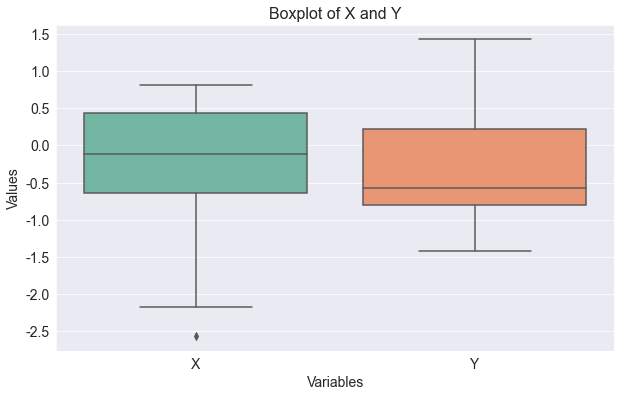

In [47]:
plt.figure(figsize = (10,6))

sns.set_style('darkgrid')
sns.set_palette('Set2')

ax = sns.boxplot(x="variable", y="value", data=pd.melt(data))

plt.title('Boxplot of X and Y',fontsize = 16)
plt.ylabel('Values',fontsize = 14)
plt.xlabel('Variables',fontsize = 14)

ax.set_yticklabels(ax.get_yticks(), size = 14)
ax.set_xticklabels(['X','Y'], size = 14)

plt.show()

In [48]:
# (b)

f = np.var(data['X'],ddof=1)/np.var(data['Y'],ddof=1)
n = len(data)
a=0.1
# print(fdist.ppf(1-a,dfn=(n-1),dfd=(n-1),loc=0,scale=1),f)
print('F-statistic is '+str(f))

F-statistic is 2.1050506919097494


In [49]:
np.var(data['X'],ddof=1),np.var(data['Y'],ddof=1)

(1.1344547809523808, 0.5389204095238096)

In [50]:
pvalue = (1-fdist.cdf(f,n-1,n-1,0,1))
print('P value is '+str(pvalue))

P value is 0.08804810865056345


In [51]:
data['Xm'] = data['X']-np.mean(data['X'])
data['Xm2'] = data['Xm']*data['Xm']
np.sum(data['Xm2'])/(n-1)

1.134454780952381

In [52]:
data['Ym'] = data['Y']-np.mean(data['Y'])
data['Ym2'] = data['Ym']*data['Ym']
np.sum(data['Ym2'])/(n-1)

0.5389204095238096

In [53]:
np.sum(data['Xm2'])/np.sum(data['Ym2'])

2.1050506919097494

This is where it gets confusing. Authors say "for a one-sided hypothesis" but no matter what, the F-statistic has to be rejected if it is too small or too large which means we have to use $F \leq f_{\alpha/2}$ or $F > f_{1-\alpha/2}$. In that case, we cannot reject $H_0$ because it $f_{1-0.1/2} \approx 2.5$ and our F-statistic is less than that. 

Had they meant "use the one sided critical value as $\alpha/2=0.1$", then the result above is correct and we can reject $H_0$.

I suppose they are trying to make a point here that we might end up rejecting the hypothesis even though it is true, because the distribution is not a normal distribution. But who knows what they had in mind.

***(c)*** It is not exact because the distribution is not normal.

In [54]:
xb = np.mean(data['X'])
yb = np.mean(data['Y'])
sx = np.sum((data['X']-xb)**2)/(n-1)
sy = np.sum((data['Y']-yb)**2)/(n-1)

sx/sy,f,n

(2.10505069190975, 2.1050506919097494, 15)

#### Exercise 8.3.18.

Solutions manual has the solution.

#### Exercise 8.3.19. 

For Table $8.3.1$ of Example $8.3.4,$ show that the half-width of the $95\%$ confidence interval for a binomial proportion as given in Chapter $4$ is $0.004$ at the nominal value of $0.05.$

#### Solution:

Equation $4.2.7$ gives the half width as $z_{\alpha/2}\times\sqrt{\alpha(1-\alpha)/n}$ where for us, $n=10000$.

In [55]:
zaby2 = norm.ppf(0.975,0,1)
na = 10000
a = 0.05
accuracy = zaby2*np.sqrt(a*(1-a)/na)
print(accuracy)

0.004271642470794705


#### Exercise 8.3.20. 

If computational facilities are available, perform a Monte Carlo study of the two-sided t-test for the skewed contaminated normal situation of Example $8.3.4.$ The R function rscn.R generates variates from the distribution of $X$.

In [56]:
# As usual, the R code was converted to Python using the website -- https://www.codeconvert.ai/r-to-python-converter

In [57]:
def rscn(n, eps, sd, mu):
    """
    Returns a random sample of size n drawn from
    a skewed contaminated normal distribution with percent
    contamination eps, variance ratio sd, and mean mu.
    """
    x1 = np.random.normal(size=n)
    x2 = np.random.normal(mu, sd, size=n)
    b1 = np.random.binomial(1, eps, size=n)
    rscn = x1 * (1 - b1) + b1 * x2
    return rscn

In [58]:
def get_alpha(rscn0,mux,ta):
    n = len(rscn0)
    xb = np.mean(rscn0)
    sn = np.std(rscn0,ddof=1)
    tn = (xb-mux)/(sn/np.sqrt(n))
    if(tn <= ta):
        return 1
    else:
        return 0

In [59]:
n = 30
eps = 0.2
sigc = 25
mulist = [0,5,10,15,20]

rscni = rscn(n, eps, sigc, 0)

a = 0.05
ta = studt.ppf(a,n-1,0,1)

In [60]:
nbs = 10000

alist = []

for muc in mulist:
    thisum = 0
    for cnt in range(nbs):
        mux = muc*eps
        rscni = rscn(n, eps, sigc, muc)
        ahat = get_alpha(rscni,mux,ta)
        thisum = thisum + ahat
    alist.append(thisum/nbs)

In [61]:
alist

[0.0423, 0.0971, 0.1199, 0.1296, 0.137]

In [62]:
# rscni,ta,get_alpha(rscni,0,ta)

#### Exercise 8.3.21. 

Suppose $X_1,\cdots,X_n$ is a random sample on $X$ which has a $N(\mu,\sigma_0^2)$ distribution, where $\sigma_0^2$ is known. Consider the two-sided hypotheses 

$$H_0 : \mu = 0 ~~ \text{versus} ~~ H_1 : \mu \neq 0.$$

Show that the test based on the critical region $C = \{|\overline{X}| > \sqrt{\sigma_0^2/n} \times z_{\alpha/2}\}$ is an unbiased level $\alpha$ test.


#### Solution:

The test is based on the distribution of $\overline{X}$ being $N(\mu,\sigma_0^2/n)$. Let $\sigma \triangleq \sigma_0/\sqrt{n}$. The power function is given by 

$$\gamma_C(\mu) = 1-\int_{\mu_0-\sigma z_{\alpha/2}}^{\mu_0+\sigma z_{\alpha/2}}f_{\mu}(x)dx$$ 

where the pdf $f_{\mu}(x)$ is given by

$$f_{\mu}(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp{\left [ -\frac{(x-\mu)^2}{2\sigma^2}\right]}.$$

Now using Leibniz rule (https://en.wikipedia.org/wiki/Leibniz_integral_rule), we get

$$
\begin{align}
\frac{d \gamma_C(\mu)}{d\mu} &= - \frac{1}{\sigma^2} \int_{\mu_0-\sigma z_{\alpha/2}}^{\mu_0+\sigma z_{\alpha/2}}(x-\mu)f_{\mu}(x)dx
\end{align}
$$

and

$$
\begin{align}
\frac{d^2 \gamma_C(\mu)}{d\mu^2} &= \frac{1}{\sigma^2} \int_{\mu_0-\sigma z_{\alpha/2}}^{\mu_0+\sigma z_{\alpha/2}}f_{\mu}(x)dx - \frac{1}{\sigma^4} \int_{\mu_0-\sigma z_{\alpha/2}}^{\mu_0+\sigma z_{\alpha/2}}(x-\mu)^2f_{\mu}(x)dx \\
&= \frac{1}{\sigma^2} \int_{\mu_0-\sigma z_{\alpha/2}}^{\mu_0+\sigma z_{\alpha/2}}\left[ 1 - \left(\frac{x-\mu}{\sigma}\right)^2 \right]f_{\mu}(x)dx \\
& = \frac{1}{\sigma^2} \int_{\mu_0-\sigma z_{\alpha/2}}^{\mu_0+\sigma z_{\alpha/2}}g(x,\mu,\sigma)f_{\mu}(x)dx
\end{align}
$$

where 

$$
g(x,\mu,\sigma) \triangleq \left[ 1 - \left(\frac{x-\mu}{\sigma}\right)^2 \right].
$$

Assume that $\mu \approx \mu_0$ as we are trying to show that the double derivative is positive around $\mu_0$.

Note that 

$$
\int_{-\infty}^{\infty}g(x,\mu,\sigma)f_{\mu}(x)dx = 0
$$

and for $\lvert (x-\mu)/\sigma \rvert \geq z_{\alpha/2} > 1$ (usually true when $\alpha \leq 0.05$), $g(x,\mu,\sigma) \leq 0$ so that

$$
\int_{-\infty}^{\mu_0-\sigma z_{\alpha/2}}g(x,\mu,\sigma)f_{\mu}(x)dx + \int_{\mu_0+\sigma z_{\alpha/2}}^{+\infty}g(x,\mu,\sigma)f_{\mu}(x)dx < 0
$$

from which we can conclude 

$$
\begin{align}
\frac{d^2 \gamma_C(\mu)}{d\mu^2} &= 
\frac{1}{\sigma^2} \int_{\mu_0-\sigma z_{\alpha/2}}^{\mu_0+\sigma z_{\alpha/2}}g(x,\mu,\sigma)f_{\mu}(x)dx \\
&> 0
\end{align}
$$

so that if we set $$\frac{d \gamma_C(\mu)}{d\mu} = 0,$$ then the solution we get (if at all any) would be a minima. There is a solution for the equation above and that would be $\mu = \mu_0.$ But then it is a level $\alpha$ test and we know that $\gamma_C(\mu_0) = \alpha$. Hence for any other $\mu \neq \mu_0,$ i.e. for the alternative case, $\gamma_C(\mu) > \gamma_C(\mu_0) = \alpha$ i.e power is greater than the significance level which means this is an unbiased test.

#### Exercise 8.3.22. 

Assume the same situation as in the last exercise but consider the test with critical region $C_{*} = \{\overline{X} > \sqrt{\sigma_0^2/n} \times z_{\alpha} \}.$ Show that the test based on $C_{*}$ has significance level $\alpha$ but that it is not an unbiased test.

#### Solution:

Here, $$\gamma_{C_{*}}(\mu) = 1-\int_{-\infty}^{\mu_0+\sigma z_{\alpha}}f_{\mu}(x)dx$$ 

with the derivative given by

$$
\begin{align}
\frac{d \gamma_{C_{*}}(\mu)}{d\mu} &= - \frac{1}{\sigma^2} \int_{-\infty}^{\mu_0+\sigma z_{\alpha}}(x-\mu)f_{\mu}(x)dx
\end{align}
$$

with the second derivative given by

$$
\begin{align}
\frac{d^2 \gamma_{C_{*}}(\mu)}{d\mu^2} &= \frac{1}{\sigma^2} \int_{-\infty}^{\mu_0+\sigma z_{\alpha}}f_{\mu}(x)dx - \frac{1}{\sigma^4} \int_{-\infty}^{\mu_0+\sigma z_{\alpha}}(x-\mu)^2f_{\mu}(x)dx \\
& > 0
\end{align}
$$

where we can arrive at the last statement using a similar argument as in the previous problem.

So the derivative of the power function is still an increasing function of $\mu$ but unlike before, there is no solution to $$\frac{d \gamma_{C_{*}}(\mu)}{d\mu} = 0.$$
The last line also requires some proof but it is very similar to the argument about the double derivative in the previous problem. Using the fact that $E_{\mu}(X-\mu) = 0$, the integral represented by the derivative of the power function can be shown to be non-zero for finite $\mu$.